# IMPORTS

In [21]:
import requests, glob, os, zipfile
import cv2
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from tensorflow.keras import layers, models, losses, utils
import keras
from keras.utils import to_categorical
#from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU


# CARGAR DATASET


In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!unzip /content/drive/MyDrive/cnn_dataset/u-tadanimalcnn.zip


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train_images/train_images/ragno/OIP-9seM3MO38cFCK8sCzSiuDQHaLH.jpeg  
  inflating: train_images/train_images/ragno/OIP-9st63KEyyL2L8G9qSqHjbQHaFf.jpeg  
  inflating: train_images/train_images/ragno/OIP-9u3Jnd4tyOPVa4rkOj784QHaE7.jpeg  
  inflating: train_images/train_images/ragno/OIP-9uLusvz9euGhbZK6ZoueSAHaFj.jpeg  
  inflating: train_images/train_images/ragno/OIP-9viO3hgdYjOTc6_CdqSvFAEsEE.jpeg  
  inflating: train_images/train_images/ragno/OIP-9wAmqbQU0DOILxxHpeaeJQHaE-.jpeg  
  inflating: train_images/train_images/ragno/OIP-9x4voQhQ6C2ENinTwkka2AHaFj.jpeg  
  inflating: train_images/train_images/ragno/OIP-9yQeSj0WmiYhOdF4tN8CWQHaFe.jpeg  
  inflating: train_images/train_images/ragno/OIP-A0CjTy-noxd-qGBPL0N98AHaFS.jpeg  
  inflating: train_images/train_images/ragno/OIP-A18nJuy4E8aHtH3wfZ0xLgHaKl.jpeg  
  inflating: train_images/train_images/ragno/OIP-A1PNj3pKUqVFDaJNmT1_LgHaHD.jpeg  
  inflating: train_images/

## Carga de datos manual

In [6]:
X = []
y = []
cont = 0

print("---Processing cane---")
for animal_image in glob.glob('/content/train_images/train_images/cane/*'):

    img = Image.open(animal_image).convert('RGB')

    img= cv2.imread(animal_image,cv2.IMREAD_COLOR)
    #Transform images to grayscale and 64x64 resolution
    img = cv2.resize(img,(64, 64))
    
    X.append(np.asarray(img))
    y.append([1,0,0,0,0,0,0,0,0,0])

    cont = cont + 1
    if cont%1500 == 0:
        print(cont, ' images loaded')


print("---Processing cavallo---")
for animal_image in glob.glob('/content/train_images/train_images/cavallo/*'):

    img = Image.open(animal_image).convert('RGB')

    img= cv2.imread(animal_image,cv2.IMREAD_COLOR)
    #Transform images to grayscale and 64x64 resolution
    img = cv2.resize(img,(64, 64))
    
    X.append(np.asarray(img))
    y.append([0,1,0,0,0,0,0,0,0,0])

    cont = cont + 1
    if cont%1500 == 0:
        print(cont, ' images loaded')

print("---Processing elefante---")
for animal_image in glob.glob('/content/train_images/train_images/elefante/*'):

    img = Image.open(animal_image).convert('RGB')

    img= cv2.imread(animal_image,cv2.IMREAD_COLOR)
    #Transform images to grayscale and 64x64 resolution
    img = cv2.resize(img,(64, 64))
    
    X.append(np.asarray(img))
    y.append([0,0,1,0,0,0,0,0,0,0])

    cont = cont + 1
    if cont%1500 == 0:
        print(cont, ' images loaded')

print("---Processing farfalla---")
for animal_image in glob.glob('/content/train_images/train_images/farfalla/*.jpeg'):

    img = Image.open(animal_image).convert('RGB')
    
    img= cv2.imread(animal_image,cv2.IMREAD_COLOR)
    #Transform images to grayscale and 64x64 resolution
    img = cv2.resize(img,(64, 64))
    
    X.append(np.asarray(img))
    y.append([0,0,0,1,0,0,0,0,0,0])

    cont = cont + 1
    if cont%1500 == 0:
        print(cont, ' images loaded')



print("---Processing gallina---")
for animal_image in glob.glob('/content/train_images/train_images/gallina/*'):

    img = Image.open(animal_image).convert('RGB')

    img= cv2.imread(animal_image,cv2.IMREAD_COLOR)  #Resize Image using Opencv Python
    #Transform images to grayscale and 64x64 resolution
    img = cv2.resize(img,(64, 64))
    
    X.append(np.asarray(img))
    y.append([0,0,0,0,1,0,0,0,0,0])

    cont = cont + 1
    if cont%1500 == 0:
        print(cont, ' images loaded')



print("---Processing gatto---")
for animal_image in glob.glob('/content/train_images/train_images/gatto/*'):

    img = Image.open(animal_image).convert('RGB')

    img= cv2.imread(animal_image,cv2.IMREAD_COLOR)
    #Transform images to grayscale and 64x64 resolution
    img = cv2.resize(img,(64, 64))
    
    X.append(np.asarray(img))
    y.append([0,0,0,0,0,1,0,0,0,0])

    cont = cont + 1
    if cont%1500 == 0:
        print(cont, ' images loaded')


print("---Processing mucca---")
for animal_image in glob.glob('/content/train_images/train_images/mucca/*'):

    img = Image.open(animal_image).convert('RGB')

    img= cv2.imread(animal_image,cv2.IMREAD_COLOR)
    #Transform images to grayscale and 64x64 resolution
    img = cv2.resize(img,(64, 64))
    
    X.append(np.asarray(img))
    y.append([0,0,0,0,0,0,1,0,0,0])

    cont = cont + 1
    if cont%1500 == 0:
        print(cont, ' images loaded')


print("---Processing pecora---")
for animal_image in glob.glob('/content/train_images/train_images/pecora/*'):

    img = Image.open(animal_image).convert('RGB')

    img= cv2.imread(animal_image,cv2.IMREAD_COLOR)
    #Transform images to grayscale and 64x64 resolution
    img = cv2.resize(img,(64, 64))
    
    X.append(np.asarray(img))
    y.append([0,0,0,0,0,0,0,1,0,0])

    cont = cont + 1
    if cont%1500 == 0:
        print(cont, ' images loaded')

print("---Processing ragno---")
for animal_image in glob.glob('/content/train_images/train_images/ragno/*'):

    img = Image.open(animal_image).convert('RGB')
    
    img= cv2.imread(animal_image,cv2.IMREAD_COLOR)
    #Transform images to grayscale and 64x64 resolution
    img = cv2.resize(img,(64, 64))
    
    X.append(np.asarray(img))
    y.append([0,0,0,0,0,0,0,0,1,0])

    cont = cont + 1
    if cont%1500 == 0:
        print(cont, ' images loaded')

print("---Processing scoiattolo---")
for animal_image in glob.glob('/content/train_images/train_images/scoiattolo/*'):

    img = Image.open(animal_image).convert('RGB')

    img= cv2.imread(animal_image,cv2.IMREAD_COLOR)
    #Transform images to grayscale and 64x64 resolution
    img = cv2.resize(img,(64, 64))
    
    X.append(np.asarray(img))
    y.append([0,0,0,0,0,0,0,0,0,1])

    cont = cont + 1
    if cont%1500 == 0:
        print(cont, ' images loaded')

X = np.asarray(X)
# Normalise images from range [0, 255] to [0, 9]
#X = X / 255

y = np.asarray(y)

print('Images array shape ', np.shape(X))
print('Labels array shape ', np.shape(y))


---Processing cane---
1500  images loaded
3000  images loaded
---Processing cavallo---
4500  images loaded
6000  images loaded
---Processing elefante---
---Processing farfalla---
7500  images loaded
---Processing gallina---
9000  images loaded
10500  images loaded
---Processing gatto---
12000  images loaded
---Processing mucca---
13500  images loaded
---Processing pecora---
15000  images loaded
---Processing ragno---
16500  images loaded
18000  images loaded
---Processing scoiattolo---
19500  images loaded
Images array shape  (20717, 64, 64, 3)
Labels array shape  (20717, 10)


In [7]:
#cargar las imagenes de test

X_final_test = []
X_final_img = []

clases_animales = ["cane","cavallo","elefante","farfalla","gallina","gatto","mucca","pecora","ragno","scoiattolo"]

for animal_image in glob.glob("/content/test_images/test_images/*"):
 
  img = Image.open(animal_image)
  img = img.resize((64,64))
     
  X_final_img.append(np.asarray(img))
 # X_final_test.append(np.asarray(img))
  X_final_test.append(animal_image.split("/")[4])

  #X_final_test[animal_image]=X_final_test.astype('float')
  #X_final_img[animal_image]=X_final_img.astype('float')

X_final_img = np.asarray(X_final_img)


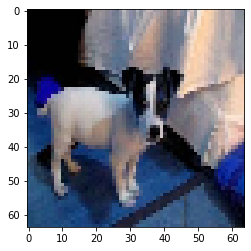

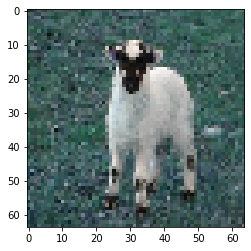

In [8]:
id = 1
plt.imshow(X[id])
plt.show()

id = 15001
plt.imshow(X[id])
plt.show()

#SETS DE ENTRENAMIENTO, TEST VALIDACION


In [9]:
#Mezclar todo y crear los grupos de entrenamiento y testing

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20)
train_X = train_X/255
val_X = val_X/255

"""train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32') #redondea el decimal
test_X = test_X.astype('float32')"""
#train_X = train_X / 255.
#test_X = test_X / 255.

#Cambiar etiquetas de categorical a one-hot encoding
#train_Y_one_hot = to_categorical(train_y)


# Vemos la diferencia de las etiquetas
#print('Original label:', train_Y[0])
#print('After conversion to one-hot:', train_Y_one_hot[0])



"train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)\nprint('Training data shape : ', train_X.shape, train_Y.shape)\nprint('Testing data shape : ', test_X.shape, test_Y.shape)\n\ntrain_X = train_X.astype('float32') #redondea el decimal\ntest_X = test_X.astype('float32')"


#CREAMOS LA RED



In [10]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 9216)              0

#ENTRENAMOS LA RED

In [11]:
#history = model.fit(train_X, batch_size=64, epochs=5)

history = model.fit(train_X, train_y, validation_data = (val_X, val_y), batch_size=256, epochs = 10)

#history = model.fit(train_ds,batch_size=64,epochs=5)

Epoch 1/10
65/65 [==============================] - 11s 37ms/step - loss: 1.9534 - accuracy: 0.3189 - val_loss: 1.7505 - val_accuracy: 0.4134
Epoch 2/10
65/65 [==============================] - 2s 24ms/step - loss: 1.6050 - accuracy: 0.4609 - val_loss: 1.5397 - val_accuracy: 0.4891
Epoch 3/10
65/65 [==============================] - 2s 24ms/step - loss: 1.4473 - accuracy: 0.5103 - val_loss: 1.5182 - val_accuracy: 0.4797
Epoch 4/10
65/65 [==============================] - 2s 24ms/step - loss: 1.3459 - accuracy: 0.5481 - val_loss: 1.3789 - val_accuracy: 0.5379
Epoch 5/10
65/65 [==============================] - 2s 24ms/step - loss: 1.2602 - accuracy: 0.5779 - val_loss: 1.3694 - val_accuracy: 0.5548
Epoch 6/10
65/65 [==============================] - 2s 24ms/step - loss: 1.1919 - accuracy: 0.6013 - val_loss: 1.2946 - val_accuracy: 0.5707
Epoch 7/10
65/65 [==============================] - 2s 33ms/step - loss: 1.1199 - accuracy: 0.6266 - val_loss: 1.2251 - val_accuracy: 0.5912
Epoch 8/10
6

#EVALUAMOS LA RED


In [12]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('acc')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

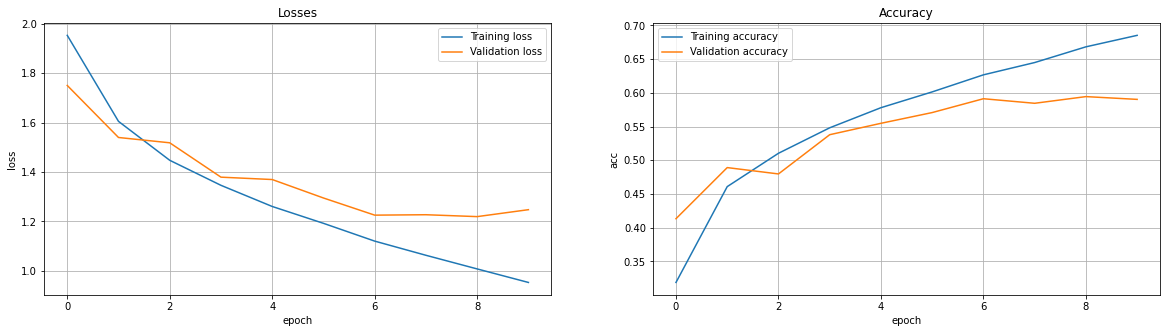

In [13]:
plot_losses(history.history)

In [14]:
test_eval = model.evaluate(val_X,val_y,verbose=1)

print('Test loss: ',test_eval[0])
print('Test accuracy: ',test_eval[1])


130/130 [==============================] - 1s 4ms/step - loss: 1.2472 - accuracy: 0.5903
Test loss:  1.247223138809204
Test accuracy:  0.5902509689331055


#MATRIZ DE CONFUSION

130/130 [==============================] - 0s 3ms/step


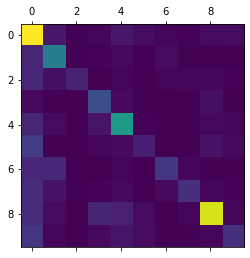

In [22]:
matriz = confusion_matrix(np.argmax(val_y, axis=1), np.argmax(model.predict(val_X), axis=1))

plt.matshow(matriz)
plt.show()

#PREDICT IMAGES

In [17]:
y_final_pred = model.predict(X_final_img)
y_final_pred = np.argmax(y_final_pred, axis=1)


157/157 [==============================] - 0s 2ms/step


In [20]:
with open('final_predictionsss.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['id', 'category'])

    for i, pred in enumerate(y_final_pred):
        writer.writerow([X_final_test[i], clases_animales[pred]])
